# Homework 6

Submitted by: Pranav Sharma

Date: 9th November , 2021

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import requests
from io import StringIO
import matplotlib.pyplot as plt 
pd.options.display.max_columns = None

In [2]:
#Loading dataset into Jupyter environment - a security warning will appear. You can ignore it.
url_busdata="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/BusActivity_SY30_2019.csv"
csvbusdata=requests.get(url_busdata,verify=False).text  #this will generate a warning but you can proceed

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [3]:
#Loading Syracuse Weather dataset into Jupyter environment - a security warning will appear. You can ignore it.
url_weatherdata="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/syracuse_2019_weather.csv"
csvweatherdata=requests.get(url_weatherdata,verify=False).text  #this will generate a warning but you can proceed

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [4]:
#Setup the bus_activity dataframe with the data from the dataset correctly formatted. 
#You still need to set the column that will be the index
bus_activity=pd.read_csv(StringIO(csvbusdata))

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
#Setup the bus_activity dataframe with the data from the dataset correctly formatted. 
#You still need to set the column that will be the index
weather_2019=pd.read_csv(StringIO(csvweatherdata))

In [6]:
#Drop some columns that won't be needed
bus_activity.drop(['SURVEY_DATE','VEHICLE_DESCRIPTION','GARAGE_NAME','DIVISION_NAME','COMMENTS','WHEELCHAIRS','SORT_ORDER','MODIFIED'],axis=1,inplace=True)

In [7]:
weather_2019=pd.read_csv(StringIO(csvweatherdata), index_col =2 , parse_dates=True)

In [8]:
weather_2019.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  365 non-null    object 
 1   NAME     365 non-null    object 
 2   AWND     365 non-null    float64
 3   PRCP     365 non-null    float64
 4   SNOW     365 non-null    float64
 5   TAVG     365 non-null    int64  
 6   TMAX     365 non-null    int64  
 7   TMIN     365 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 25.7+ KB


In [9]:
# identigying unique values in the dataframe
# commenting the code below because the output is way too big to be in a PDF
#for coly in weather_2019:
#    print(coly)
#    print(weather_2019[coly].unique())
#    print(len(weather_2019[coly].unique()))

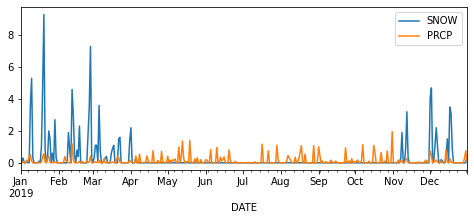

In [10]:
figsize=(8,3)
weather_2019.SNOW.plot(figsize=figsize)
weather_2019.PRCP.plot(figsize=figsize)
#weather_2019.TAVG.plot(figsize=figsize)
plt.legend()
# as we can we can see, better to plot them separately

DATE
2019-01-01    40
Name: TAVG, dtype: int64

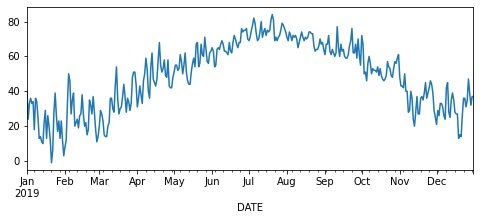

In [11]:
weather_2019.TAVG.plot(figsize=figsize)
weather_2019[weather_2019.index=='2019-01-01'].TAVG


In [12]:
#weather_2019.SNOW.plot(figsize=figsize)

In [13]:
# importing bus _activity . Later changing this so that date time be used as index
bus_activity=pd.read_csv(StringIO(csvbusdata))

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
# using trip_start_time as index. I feel it is a better choice than time_actual_arrive because number of people getting on 
# the bus on the bus stops might be zero, but trip_start_time value remains the same through out the trip. Thus we get a reduced 
# number of 0 passengers entries to deal with while plotting our graphs
bus_activity= pd.read_csv(StringIO(csvbusdata),index_col=9,parse_dates=True)

In [15]:
#Drop some columns that won't be needed
bus_activity.drop(['SURVEY_DATE','VEHICLE_DESCRIPTION','GARAGE_NAME','DIVISION_NAME','COMMENTS','WHEELCHAIRS','SORT_ORDER','MODIFIED'],axis=1,inplace=True)

In [16]:
bus_activity.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 363858 entries, 2019-01-02 05:27:00 to 2019-12-31 07:12:00
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SERIAL_NUMBER        363858 non-null  int64  
 1   SCHEDULE_ID          363858 non-null  int64  
 2   SCHEDULE_NAME        363858 non-null  object 
 3   PATTERN_ID           363858 non-null  int64  
 4   ROUTE_NUMBER         363858 non-null  int64  
 5   ROUTE_NAME           363858 non-null  object 
 6   DIRECTION_NAME       363858 non-null  object 
 7   BRANCH               363858 non-null  object 
 8   TIME_PERIOD          363858 non-null  object 
 9   SERVICE_PERIOD       363858 non-null  object 
 10  TRIP_NUMBER          363858 non-null  int64  
 11  TRIP_KEY             363858 non-null  int64  
 12  BLOCK_NUMBER         363858 non-null  int64  
 13  BLOCK_KEY            363858 non-null  int64  
 14  BLOCK_NAME           363858 non-nu

In [17]:
#bus_activity[bus_activity.PASSENGERS_ON>10]

In [18]:
x = 363858 / 365 # total rows divided by the number of days in an year.
x/60 #60 minutes in an hour. Dividing my 60 to find out number of hours a bus runs in a day. 

# A value of 16.61 shows that a bus runs at an average of 16.6 hours daily excluding the days when buses do not run at all. 

16.614520547945208

In [19]:
# identigying unique values in the dataframe
# commenting the code below because the output is way too big to be in a PDF
#for col in bus_activity:
#    print(col)
#    print(bus_activity[col].unique())
#    print(len(bus_activity[col].unique()))

### data filling and transformation of bus_activity

In [20]:
bus_activity.RUNNING_TIME_ACTUAL.fillna(method='ffill',inplace=True)

In [21]:
bus_activity.DWELL_TIME.fillna(method='ffill',inplace=True)

In [22]:
bus_activity.TIMEPOINT_MILES.fillna(method='ffill',inplace=True)

In [23]:
bus_activity.DWELL_TIME.fillna(0, inplace=True)

In [24]:
bus_activity.TIME_SCHEDULED.fillna(0,inplace=True)

In [25]:
bus_activity.isna().sum() # here we check if any value is missing or not. is there any NaN left ot not!

SERIAL_NUMBER          0
SCHEDULE_ID            0
SCHEDULE_NAME          0
PATTERN_ID             0
ROUTE_NUMBER           0
ROUTE_NAME             0
DIRECTION_NAME         0
BRANCH                 0
TIME_PERIOD            0
SERVICE_PERIOD         0
TRIP_NUMBER            0
TRIP_KEY               0
BLOCK_NUMBER           0
BLOCK_KEY              0
BLOCK_NAME             0
RUN_NUMBER             0
RUN_KEY                0
VEHICLE_NUMBER         0
VEHICLE_SEATS          0
OPERATOR_ID            0
STOP_ID                0
MAIN_CROSS_STREET      0
TRAVEL_DIRECTION       0
TIMEPOINT              0
SEGMENT_MILES          0
TIME_SCHEDULED         0
TIME_ACTUAL_ARRIVE     0
TIME_ACTUAL_DEPART     0
DWELL_TIME             0
RUNNING_TIME_ACTUAL    0
PASSENGERS_ON          0
PASSENGERS_OFF         0
PASSENGERS_IN          0
TIMEPOINT_MILES        0
FIRST_LAST_STOP        0
UNIQUE_ID              0
stop_lat               0
stop_lon               0
dtype: int64

In [26]:
bus_activity.head()

,SERIAL_NUMBER,SCHEDULE_ID,SCHEDULE_NAME,PATTERN_ID,ROUTE_NUMBER,ROUTE_NAME,DIRECTION_NAME,BRANCH,TIME_PERIOD,SERVICE_PERIOD,TRIP_NUMBER,TRIP_KEY,BLOCK_NUMBER,BLOCK_KEY,BLOCK_NAME,RUN_NUMBER,RUN_KEY,VEHICLE_NUMBER,VEHICLE_SEATS,OPERATOR_ID,STOP_ID,MAIN_CROSS_STREET,TRAVEL_DIRECTION,TIMEPOINT,SEGMENT_MILES,TIME_SCHEDULED,TIME_ACTUAL_ARRIVE,TIME_ACTUAL_DEPART,DWELL_TIME,RUNNING_TIME_ACTUAL,PASSENGERS_ON,PASSENGERS_OFF,PASSENGERS_IN,TIMEPOINT_MILES,FIRST_LAST_STOP,UNIQUE_ID,stop_lat,stop_lon
TRIP_START_TIME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02 05:27:00,2604506,298,Sep18 (Weekday),180900565,336,SY30,TO HUB,[Sy30]Inbound 330,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,38,2958,17203,DeWitt Wegmans Park-N-Ride,N,0,0.167,2019-01-02 05:27:00.000,2019-01-02 05:25:55.000,2019-01-02 05:25:55.000,0.0,2.05,0,0,0,0.941,1,33600000002,43.031959,-76.050541
2019-01-02 05:27:00,2604506,298,Sep18 (Weekday),180900565,336,SY30,TO HUB,[Sy30]Inbound 330,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,38,2958,2292,E Genesee St/Kittell Rd,W,0,0.581,0,2019-01-02 05:30:22.000,2019-01-02 05:30:22.000,0.0,2.05,0,0,0,0.941,2,33600000003,43.031471,-76.053133
2019-01-02 05:27:00,2604506,298,Sep18 (Weekday),180900565,336,SY30,TO HUB,[Sy30]Inbound 330,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,38,2958,1769,Erie Blvd E/E Genesee St,W,0,0.193,0,2019-01-02 05:31:22.000,2019-01-02 05:31:22.000,0.0,2.05,0,0,0,0.941,2,33600000004,43.034476,-76.063822
2019-01-02 05:27:00,2604506,298,Sep18 (Weekday),180900565,336,SY30,TO HUB,[Sy30]Inbound 330,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,38,2958,1772,E Genesee St/Jamesville Rd,W,0,0.165,2019-01-02 05:30:00.000,2019-01-02 05:31:49.000,2019-01-02 05:31:49.000,0.0,8.25,0,0,0,2.822,2,33600000006,43.035233,-76.067472
2019-01-02 05:27:00,2604506,298,Sep18 (Weekday),180900565,336,SY30,TO HUB,[Sy30]Inbound 330,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,38,2958,2274,E Genesee St/Orvilton Dr,W,0,0.076,0,2019-01-02 05:32:12.000,2019-01-02 05:32:12.000,0.0,8.25,0,0,0,2.822,2,33600000007,43.035846,-76.070604


In [27]:
bus_no_passenger=bus_activity[bus_activity.PASSENGERS_ON==0]
bus_no_passenger.index.drop_duplicates()

DatetimeIndex(['2019-01-02 05:27:00', '2019-01-02 06:05:00',
               '2019-01-02 06:42:00', '2019-01-02 07:20:00',
               '2019-01-02 07:51:00', '2019-01-02 16:40:00',
               '2019-01-02 09:02:00', '2019-01-02 10:54:00',
               '2019-01-02 11:50:00', '2019-01-02 09:25:00',
               ...
               '2019-12-31 15:25:00', '2019-12-31 08:05:00',
               '2019-12-31 12:04:00', '2019-12-31 12:55:00',
               '2019-12-31 15:49:00', '2019-12-31 16:10:00',
               '2019-12-31 16:59:00', '2019-12-31 17:45:00',
               '2019-12-31 06:35:00', '2019-12-31 07:12:00'],
              dtype='datetime64[ns]', name='TRIP_START_TIME', length=6730, freq=None)

## plotting the SY30 data

In [28]:
grp_by_series=bus_activity.groupby(bus_activity.index)

<AxesSubplot:xlabel='TRIP_START_TIME'>

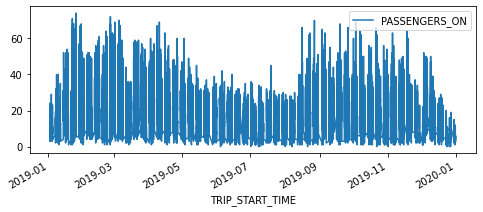

In [29]:
# since every trip had a same time starting. Rather than recording number of people getting on the bus at every stop,
# I am recording the total number of people that got ON the bus for 1 trip. Furthermore, before every trip ends the number of people 
# in the bus returns to Zero as all passengers come off before start of a new trip. 
per_trip_passengers=pd.DataFrame(grp_by_series.PASSENGERS_ON.sum())
# it also gives us an interesting idea that total trips made were 6730 in an year. 

per_trip_passengers.plot( figsize= figsize)


In [30]:
from ipywidgets import interact , widgets

@interact (periods=widgets.IntSlider(min=10,max=100,step=5,value=10))
def passengers_on_moving_plot_average(periods=50):
    figsize=(30,3)
    plt.figure()
    per_trip_passengers.rolling(periods).mean().plot(title='Passengers on Bus',figsize=figsize)
    plt.ylabel('number of passengers')
    plt.figure()
    weather_2019.TAVG.plot(title='Temperature',figsize=figsize)
    plt.ylabel('avg temperature')
    plt.show()
    #weather_2019.SNOW.plot(figsize=figsize)
    #weather_2019.PRCP.plot(figsize=figsize)
    

interactive(children=(IntSlider(value=10, description='periods', min=10, step=5), Output()), _dom_classes=('wi…

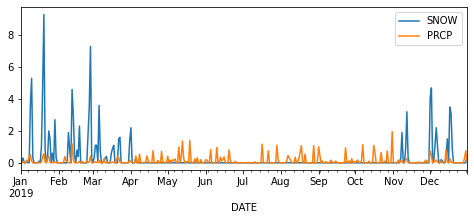

In [31]:
weather_2019.SNOW.plot(figsize=figsize)
weather_2019.PRCP.plot(figsize=figsize)
plt.legend()

### Anomaly in the data

The straight lines which we see in the first  graph are the time differences between the trip start time between days when no trip was scheduled. Thus it just joins the points by a straight line. I have already established that the buses work for 16 hours in a day.Therefore, after everyday , we would see a blank area when no buses were scheduled. You can see the above ^^
Second reason for those empty values is the days when the buses do not run, ie on the weekends. Thus bus not running on the 1st Jan is an anomaly because it is not a weekend. We can assume , due to the new year holiday , the buses did not run.

/tmp/ipykernel_73/1014694869.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  per_trip_passengers['2019-01-06'].plot() # weekend


<AxesSubplot:xlabel='TRIP_START_TIME'>

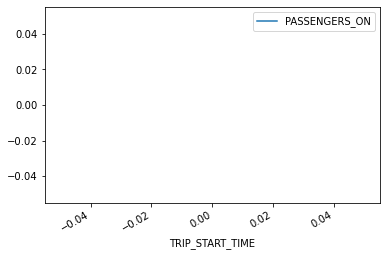

In [32]:
per_trip_passengers['2019-01-06'].plot() # weekend

In [33]:
# the below code will give error because there is no index value of 1st January
per_trip_passengers['2019-01-01']


KeyError: '2019-01-01'

/tmp/ipykernel_73/1419207752.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  per_trip_passengers['2019-05-03'].plot()


<AxesSubplot:xlabel='TRIP_START_TIME'>

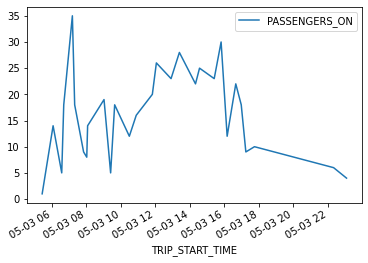

In [34]:
# a normal day graph of number of passengers in a trip. As mentioned above, you can see the start time to be 6 am
# and the end time to be near 23:00 hours ie 11 pm.
per_trip_passengers['2019-05-03'].plot()

In [35]:
# average temp df
average_temp_df = weather_2019['TAVG']
bus_activity_B = bus_activity.set_index(['BRANCH'],append=True)
bus_activity_B['ocurrences'] = np.ones(len(bus_activity_B), dtype=int)

bus_activity_B_grouped = bus_activity_B['ocurrences'].groupby(level=[0,1]).sum()


In [36]:
bus_activity_B_grouped

TRIP_START_TIME      BRANCH                      
2019-01-02 05:27:00  [Sy30]Inbound 330               55
2019-01-02 06:05:00  [Sy30]Outbound 330              54
2019-01-02 06:35:00  [Sy30]Outbound 330              54
2019-01-02 06:42:00  [Sy30]Inbound 330               55
2019-01-02 07:12:00  [Sy30]Inbound 330               55
                                                     ..
2019-12-31 16:59:00  [sy30]Inbound 530               54
2019-12-31 17:15:00  [sy30]Outbound 530 + Wegmans    58
2019-12-31 17:45:00  [sy30]Outbound 530              53
2019-12-31 22:20:00  [sy30]Outbound 230              47
2019-12-31 23:05:00  [sy30]Inbound 230               49
Name: ocurrences, Length: 6730, dtype: int64

In [37]:
bus_activity_branch = bus_activity_B_grouped.unstack(level=1).fillna(0).resample('D').sum().fillna(0).astype(int)

In [38]:
bus_activity_branch.head()

BRANCH,[Sy30]Inbound 130 to A3,[Sy30]Inbound 230,[Sy30]Inbound 330,[Sy30]Inbound 530,[Sy30]Inbound 530 + Home,[Sy30]Inbound 530 + Wegmans + Home,[Sy30]Inbound 530 to B17,[Sy30]Outbound 130,[Sy30]Outbound 230,[Sy30]Outbound 330,[Sy30]Outbound 530,[Sy30]Outbound 530 + Home,[Sy30]Outbound 530 + Home + Wegmans,[Sy30]Outbound 530 + Wegmans,[sy30]Inbound 130 to A3,[sy30]Inbound 230,[sy30]Inbound 330,[sy30]Inbound 530,[sy30]Inbound 530 + Home,[sy30]Inbound 530 + Wegmans + Home,[sy30]Inbound 530 to B17,[sy30]Outbound 130,[sy30]Outbound 230,[sy30]Outbound 330,[sy30]Outbound 530,[sy30]Outbound 530 + Home,[sy30]Outbound 530 + Home + Wegmans,[sy30]Outbound 530 + Wegmans
TRIP_START_TIME,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,42,49,220,54,55,116,57,39,47,108,53,53,116,174,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-01-03,0,49,110,108,110,116,57,0,47,54,106,53,116,290,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-01-04,42,49,220,162,110,116,57,39,47,108,159,53,116,290,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-01-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Correlation Plotting

In [39]:
dailyWeatherTemp = weather_2019.TAVG.resample('D').sum()
bus_activity_daily =  bus_activity.PASSENGERS_ON.resample('D').sum()

In [40]:
combinedDF = pd.DataFrame({'bus': bus_activity_daily, 'weather': dailyWeatherTemp})

<AxesSubplot:xlabel='bus', ylabel='weather'>

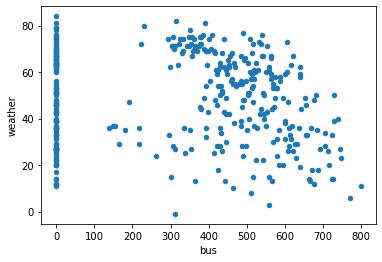

In [41]:
combinedDF.plot(kind='scatter', x= 'bus',y='weather')
# x label is the number of passengers getting on the bus daily. Y label is the average temperature 

### Correlation Matrix

In [42]:
bus_activity_branch['TAVG']=average_temp_df

In [43]:
bus_activity_branch.head()

BRANCH,[Sy30]Inbound 130 to A3,[Sy30]Inbound 230,[Sy30]Inbound 330,[Sy30]Inbound 530,[Sy30]Inbound 530 + Home,[Sy30]Inbound 530 + Wegmans + Home,[Sy30]Inbound 530 to B17,[Sy30]Outbound 130,[Sy30]Outbound 230,[Sy30]Outbound 330,[Sy30]Outbound 530,[Sy30]Outbound 530 + Home,[Sy30]Outbound 530 + Home + Wegmans,[Sy30]Outbound 530 + Wegmans,[sy30]Inbound 130 to A3,[sy30]Inbound 230,[sy30]Inbound 330,[sy30]Inbound 530,[sy30]Inbound 530 + Home,[sy30]Inbound 530 + Wegmans + Home,[sy30]Inbound 530 to B17,[sy30]Outbound 130,[sy30]Outbound 230,[sy30]Outbound 330,[sy30]Outbound 530,[sy30]Outbound 530 + Home,[sy30]Outbound 530 + Home + Wegmans,[sy30]Outbound 530 + Wegmans,TAVG
TRIP_START_TIME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,42,49,220,54,55,116,57,39,47,108,53,53,116,174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24
2019-01-03,0,49,110,108,110,116,57,0,47,54,106,53,116,290,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33
2019-01-04,42,49,220,162,110,116,57,39,47,108,159,53,116,290,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
2019-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33
2019-01-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34


In [44]:
bus_activity_branch['SNOW']= weather_2019['SNOW']

In [45]:
bus_activity_branch['PRCP']= weather_2019['PRCP']

In [46]:
bus_activity_branch.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 364 entries, 2019-01-02 to 2019-12-31
Freq: D
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   [Sy30]Inbound 130 to A3              364 non-null    int64  
 1   [Sy30]Inbound 230                    364 non-null    int64  
 2   [Sy30]Inbound 330                    364 non-null    int64  
 3   [Sy30]Inbound 530                    364 non-null    int64  
 4   [Sy30]Inbound 530 + Home             364 non-null    int64  
 5   [Sy30]Inbound 530 + Wegmans + Home   364 non-null    int64  
 6   [Sy30]Inbound 530 to B17             364 non-null    int64  
 7   [Sy30]Outbound 130                   364 non-null    int64  
 8   [Sy30]Outbound 230                   364 non-null    int64  
 9   [Sy30]Outbound 330                   364 non-null    int64  
 10  [Sy30]Outbound 530                   364 non-null    int64  
 11  [Sy30

In [47]:
corres = bus_activity_branch.corr()

In [51]:
corres.style.background_gradient() 

BRANCH,[Sy30]Inbound 130 to A3,[Sy30]Inbound 230,[Sy30]Inbound 330,[Sy30]Inbound 530,[Sy30]Inbound 530 + Home,[Sy30]Inbound 530 + Wegmans + Home,[Sy30]Inbound 530 to B17,[Sy30]Outbound 130,[Sy30]Outbound 230,[Sy30]Outbound 330,[Sy30]Outbound 530,[Sy30]Outbound 530 + Home,[Sy30]Outbound 530 + Home + Wegmans,[Sy30]Outbound 530 + Wegmans,[sy30]Inbound 130 to A3,[sy30]Inbound 230,[sy30]Inbound 330,[sy30]Inbound 530,[sy30]Inbound 530 + Home,[sy30]Inbound 530 + Wegmans + Home,[sy30]Inbound 530 to B17,[sy30]Outbound 130,[sy30]Outbound 230,[sy30]Outbound 330,[sy30]Outbound 530,[sy30]Outbound 530 + Home,[sy30]Outbound 530 + Home + Wegmans,[sy30]Outbound 530 + Wegmans,TAVG,SNOW,PRCP
BRANCH,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
[Sy30]Inbound 130 to A3,1.000000,0.827184,0.951349,0.912019,0.905322,0.894382,0.906661,0.974456,0.813623,0.942982,0.920732,0.778712,0.831053,0.911463,-0.470623,-0.479463,-0.488824,-0.483662,-0.487027,-0.485796,-0.447284,-0.473563,-0.479463,-0.480794,-0.481585,-0.470623,-0.474925,-0.488879,-0.249435,0.094135,0.015985
[Sy30]Inbound 230,0.827184,1.000000,0.887652,0.888162,0.898806,0.900797,0.875224,0.839986,0.987186,0.883632,0.896308,0.784245,0.837026,0.909968,-0.467620,-0.476403,-0.485705,-0.480575,-0.483919,-0.482696,-0.444430,-0.470542,-0.476403,-0.477726,-0.478512,-0.467620,-0.471894,-0.485760,-0.248639,0.062088,0.015529
[Sy30]Inbound 330,0.951349,0.887652,1.000000,0.952698,0.955810,0.949387,0.943762,0.954684,0.873661,0.986854,0.964158,0.810534,0.902584,0.965343,-0.494815,-0.504109,-0.513952,-0.508524,-0.512062,-0.510768,-0.470277,-0.497906,-0.504109,-0.505508,-0.506341,-0.494815,-0.499338,-0.514010,-0.237102,0.082791,0.021806
[Sy30]Inbound 530,0.912019,0.888162,0.952698,1.000000,0.977621,0.961915,0.945245,0.912019,0.875010,0.942050,0.983886,0.811783,0.903289,0.978262,-0.498317,-0.507677,-0.517589,-0.512123,-0.515686,-0.514383,-0.473605,-0.501430,-0.507677,-0.509086,-0.509924,-0.498317,-0.502872,-0.517648,-0.245712,0.087764,0.020339
[Sy30]Inbound 530 + Home,0.905322,0.898806,0.955810,0.977621,1.000000,0.959280,0.944758,0.911781,0.885792,0.947300,0.970110,0.821119,0.924295,0.982796,-0.499027,-0.508401,-0.518327,-0.512853,-0.516422,-0.515116,-0.474280,-0.502145,-0.508401,-0.509812,-0.510651,-0.499027,-0.503589,-0.518386,-0.258979,0.095369,0.024977
[Sy30]Inbound 530 + Wegmans + Home,0.894382,0.900797,0.949387,0.961915,0.959280,1.000000,0.946404,0.894382,0.887875,0.935981,0.967531,0.857191,0.919766,0.965885,-0.499742,-0.509129,-0.519070,-0.513588,-0.517162,-0.515854,-0.474960,-0.502865,-0.509129,-0.510542,-0.511383,-0.499742,-0.504311,-0.519129,-0.267828,0.100529,0.016807
[Sy30]Inbound 530 to B17,0.906661,0.875224,0.943762,0.945245,0.944758,0.946404,1.000000,0.906661,0.862664,0.931994,0.942253,0.819925,0.890207,0.951518,-0.491790,-0.501028,-0.510810,-0.505416,-0.508932,-0.507646,-0.467402,-0.494863,-0.501028,-0.502419,-0.503246,-0.491790,-0.496286,-0.510868,-0.286717,0.099897,0.018712
[Sy30]Outbound 130,0.974456,0.839986,0.954684,0.912019,0.911781,0.894382,0.906661,1.000000,0.826490,0.949547,0.925136,0.778712,0.845461,0.914119,-0.470623,-0.479463,-0.488824,-0.483662,-0.487027,-0.485796,-0.447284,-0.473563,-0.479463,-0.480794,-0.481585,-0.470623,-0.474925,-0.488879,-0.226334,0.062561,0.020996
[Sy30]Outbound 230,0.813623,0.987186,0.873661,0.875010,0.885792,0.887875,0.862664,0.826490,1.000000,0.869968,0.887139,0.768753,0.820135,0.896365,-0.461627,-0.470298,-0.479481,-0.474417,-0.477718,-0.476511,-0.438735,-0.464512,-0.470298,-0.471604,-0.472380,-0.461627,-0.465847,-0.479535,-0.236518,0.044339,0.010222


In [49]:
# focussing on a particular correlation
corres2 = bus_activity_branch.corr().loc[:,['TAVG']].sort_values(ascending=False, by='TAVG')

In [50]:
corres2.style.background_gradient()
# negative correlation is interesting because maybe it shows that the bus goes 'To' and 'From' each of the stops

BRANCH,TAVG
BRANCH,
TAVG,1.000000
[sy30]Inbound 530,0.272701
[sy30]Outbound 530 + Home + Wegmans,0.272082
[sy30]Outbound 230,0.260555
[sy30]Inbound 230,0.257831
[sy30]Inbound 330,0.254514
[sy30]Outbound 530,0.253433
[sy30]Inbound 530 + Home,0.248988
[sy30]Outbound 530 + Wegmans,0.248421


### Describe, but don’t perform any additional data analysis results that you think could be derived from the data provided in the datasets.

IF we do data analysis by taking different index for the bus_activity like using time_actual_arrive as suggested in the HW PDf, we would be able to obtain different data analysis. For eg, using the time_actual_arrive we can then correlate the longitude and the latitude values of the bus stops ie the location of the bus stops when the buses arrive to the weather. We could have analyzed the impact of weather conditions to the specific bus stop locations and which bus stop locations were impacted by the weather specifically. 
Finding anomalies in those data would enable us in maybe finding a municipality issue which could be fixed so that the particular area around the bus-stop is less affected. It is assumed that population density is the same across all the bus stops.